Main theme: Simulate and understand how quantum processors simulate on the backend by using classical simulations rather than additioanlly implementing quantum circuits and run the qunatum processor on the backend.
So we want to approximate the quantum process measurement withuot any quantum circuit or ANY quantum simulation.
Typically, we would only want to rely on classical data

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pennylane as qml
from pennylane import numpy as pnp


#1) import the necessary modules to "SIMULATE" the program because we want to run the quantum program in a classical processor rather than using the actual quantum processor to run the quantum program

In [32]:
n_qubits = 2


we want to ensure that even if we run n number of times on different pc's different computers in a different WIFI network, we still get the same value so typically we use that one specific value for both np and pnp

In [33]:
np.random.seed(7)
pnp.random.seed(7)

Here we set the normalized value where n_qubit number of values will output such that adding up all those n_qubit values will output 0 as the mean value and the statistical distribution of 0.5 

In [34]:
alphas = np.random.normal(0, 0.5, size=n_qubits)


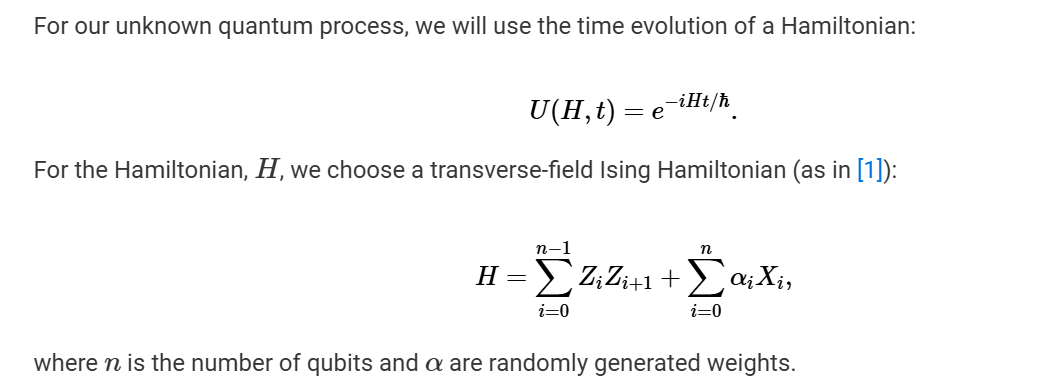

The above image is the algorithm to detect unkown quantum process solely using classical datas

In [35]:
hamiltonian = qml.sum(
    *[qml.PauliZ(wires=i) @ qml.PauliZ(wires=i + 1) for i in range(n_qubits - 1)]
) + qml.dot(alphas, [qml.PauliX(wires=i) for i in range(n_qubits)])

using scipy.stats, I am going to generate random number of states, create a matrix, proov the orthonormal basis by extracting the first column (using first oclumn  is optional however, you wouldnt think of using other columns initially, you would pick the first one to really get an idea of whats going on then the other n columns)

In [36]:
from scipy.stats import unitary_group
#get the random number states
n_random_states = 100
#using rvs, generate a random unitary matrix, with n number of qubits so if tere are 2 qwubits, you 
#would want to create 4x4 because (2**2)x(2**2)
random_unitaries = unitary_group.rvs(2**n_qubits, n_random_states)
#now loop through every value in the matrix and pick the first column
for random_unitary in random_unitaries:
    first_column = random_unitary[:,0]

creating time evolution usiing hamiltonian where for the sake of learning, we are using a default qubit, and "roll" the quanutm device so that we can access or simulate the program on any exceptional devcices. We create a target circuit with the inpout data, why? bceause we dont want to make use of quanutm circuit, just classical circuit, classical datas only. StatePrep: Typically this is the state preparation where we want to have the classical input states and the number of qubits ready to do the process (lets keep it simple its 3am). 

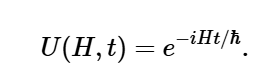

the image above shows the algorithm for trotter product where trotterization is performed. Here for simplicity purposes we want to keep order as 1 since, increasing order increases accuracy but given its 3am, i dont want to delve into complex mathematical functions to deacrease the noise. 

In [37]:
dev = qml.device("default.qubit")

@qml.qnode(dev)
def target_circuit(input_state):
    # prepare training state
    qml.StatePrep(input_state, wires=range(n_qubits))

    # evolve the Hamiltonian for time=2 so it will be in 2 units 
    # in n=1 (meaning we are keeping it simple, not breaking down the input_state) 
    # steps with the order 1 formula (again we dont want to use complex mathematical formulae right now its 3am)
    qml.TrotterProduct(hamiltonian, time=2, n=1, order=1)
    return qml.classical_shadow(wires=range(n_qubits))


qml.draw_mpl(target_circuit)(n_random_states[0])
plt.show()


TypeError: 'int' object is not subscriptable

this is where we will run the classical datas into quantum processors without the need of quantum circuit

In [38]:
n_measurements = 10000

shadows = []
for random_state in random_states:
    bits, recipes = target_circuit(random_state, shots=n_measurements)
    shadow = qml.ClassicalShadow(bits, recipes)
    shadows.append(shadow)

NameError: name 'random_states' is not defined